In [213]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [214]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Read images and Resize image to 224x224

In [215]:
def read_data(path):
    
    train_path = path+"/train"
    test_path = path+"/test"
    validation_path = path+"/val"
    # Define the new image size
    new_size = (224, 224)
    tr_data, test_data, val_data = [], [], []
    tr_out, test_out, val_out = [], [], []

    for i in os.listdir(train_path):

        if i != ".DS_Store":
            for j in os.listdir(train_path+"/"+i):
                tr_out.append(i)
                img = cv2.imread(train_path+"/"+i+"/"+j)
                # Resize the image
                resized_img = cv2.resize(img, new_size)
                tr_data.append(resized_img)
            for j in os.listdir(test_path+"/"+i):
                test_out.append(i)
                img = cv2.imread(test_path+"/"+i+"/"+j)
                # Resize the image
                resized_img = cv2.resize(img, new_size)
                test_data.append(resized_img)
            for j in os.listdir(validation_path+"/"+i):
                val_out.append(i)
                img = cv2.imread(validation_path+"/"+i+"/"+j)
                # Resize the image
                resized_img = cv2.resize(img, new_size)
                val_data.append(resized_img)
                
    tr_data, test_data, val_data = np.array(tr_data), np.array(test_data), np.array(val_data)
    tr_out, test_out, val_out = np.array(list(map(int, tr_out))), np.array(list(map(int, test_out))), np.array(list(map(int, val_out)))

    return tr_data, test_data, val_data, tr_out, test_out, val_out


In [216]:
path = "C:/Users/shilp/OneDrive/Documents/CS671/A5_data/"
train_data, test_data, val_data, train_out, test_out, val_out = read_data(path)

In [217]:
# Normalize the pixel values to [0, 1]
train_data = train_data / 255.0
val_data = val_data / 255.0
test_data = test_data / 255.0

In [218]:
def convert(data):
  out = []
  for i in data:
    if i == 0:
      out.append(0)
    if i == 1:
      out.append(1)
    if i == 2:
      out.append(2)
    if i == 3:
      out.append(3)
    if i == 4:
      out.append(4)

  return np.array(out)

In [219]:
train_label = convert(train_out)
val_label = convert(val_out)
test_label = convert(test_out)

In [220]:
# Input layer
inputs = Input(shape=(224, 224, 3))

# First convolutional layer
conv1 = Conv2D(8, (11, 11), strides=4, padding='valid', activation='relu')(inputs)
pool1 = MaxPooling2D((3, 3), strides=2)(conv1)

# Second convolutional layer
conv2 = Conv2D(16, (5, 5), strides=1, padding='valid', activation='relu')(pool1)
pool2 = MaxPooling2D((3, 3), strides=2)(conv2)

# Flatten the output from the convolutional layers
flatten = Flatten()(pool2)

# Fully connected layers
fc1 = Dense(128, activation='relu')(flatten)
output = Dense(5, activation='softmax')(fc1)

# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Save the model weights
model.save_weights("C:/Users/shilp/OneDrive/Documents/CS671/architecture_1_weights.h5")


In [221]:

callback = EarlyStopping(monitor="val_loss",min_delta=0.0001, verbose = 0, restore_best_weights=True, patience = 2)
# Train the model
model.fit(train_data, train_label, validation_data=(val_data, val_label), epochs=10000, batch_size=32,callbacks=callback,shuffle = True)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data, test_label)
print('Test accuracy:', test_acc)

Epoch 1/10000
8/8 [==============================] - 2s 113ms/step - loss: 1.5464 - accuracy: 0.3240 - val_loss: 1.4225 - val_accuracy: 0.4600
Epoch 2/10000
8/8 [==============================] - 1s 79ms/step - loss: 1.2315 - accuracy: 0.5520 - val_loss: 1.1408 - val_accuracy: 0.5600
Epoch 3/10000
8/8 [==============================] - 1s 82ms/step - loss: 1.0171 - accuracy: 0.6160 - val_loss: 1.0364 - val_accuracy: 0.5800
Epoch 4/10000
8/8 [==============================] - 1s 77ms/step - loss: 0.8793 - accuracy: 0.6880 - val_loss: 1.0437 - val_accuracy: 0.6000
Epoch 5/10000
8/8 [==============================] - 1s 79ms/step - loss: 0.8408 - accuracy: 0.6800 - val_loss: 0.8770 - val_accuracy: 0.6400
Epoch 6/10000
8/8 [==============================] - 1s 79ms/step - loss: 0.7543 - accuracy: 0.7400 - val_loss: 0.8486 - val_accuracy: 0.6800
Epoch 7/10000
8/8 [==============================] - 1s 80ms/step - loss: 0.5848 - accuracy: 0.7920 - val_loss: 0.8539 - val_accuracy: 0.6400
Epoch

In [222]:
# Evaluate the model on the val set
val_loss, val_acc = model.evaluate(val_data, val_label)
print('Val accuracy:', val_acc)

2/2 [==============================] - 0s 16ms/step - loss: 0.5355 - accuracy: 0.8000
Val accuracy: 0.800000011920929


In [223]:
# Evaluate the model on the train set
train_loss, train_acc = model.evaluate(train_data, train_label)
print('train accuracy:', train_acc)

8/8 [==============================] - 0s 14ms/step - loss: 0.2208 - accuracy: 0.9520
train accuracy: 0.9520000219345093


# Architecture 2

In [224]:
# Set the layers of Architecture-1 to non-trainable
for layer in model.layers:
    layer.trainable = False

# Define the layers for Architecture-2
# Input layer
inputs_2 = Input(shape=(224, 224, 3))
conv21 = model.layers[1](inputs_2)
maxpool21 = model.layers[2](conv21)
conv22 = model.layers[3](maxpool21)
maxpool22 = model.layers[4](conv22)
conv23 = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(maxpool22)
maxpool23 = MaxPooling2D((3, 3), strides=2)(conv23)
flatten2 = Flatten()(maxpool23)
fc21 = Dense(128, activation='relu')(flatten2)
output_layer2 = Dense(5, activation='softmax')(fc21)

# Define the model with Architecture-2
model_2 = Model(inputs=inputs_2, outputs=output_layer2)

# Compile the model
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [225]:

callback = EarlyStopping(monitor="val_loss",min_delta=0.0001, verbose = 0, restore_best_weights=True, patience = 2)
# Train the model
model_2.fit(train_data, train_label, validation_data=(val_data, val_label), epochs=10000, batch_size=32,callbacks=callback,shuffle = True)
# Evaluate the model on the test set
test_loss, test_acc = model_2.evaluate(test_data, test_label)
print('Test accuracy:', test_acc)
# Save the model weights
model_2.save_weights("C:/Users/shilp/OneDrive/Documents/CS671/architecture_2_weights.h5")


Epoch 1/10000
8/8 [==============================] - 1s 43ms/step - loss: 1.4710 - accuracy: 0.3480 - val_loss: 1.3830 - val_accuracy: 0.3600
Epoch 2/10000
8/8 [==============================] - 0s 25ms/step - loss: 1.2325 - accuracy: 0.5560 - val_loss: 1.2490 - val_accuracy: 0.5800
Epoch 3/10000
8/8 [==============================] - 0s 25ms/step - loss: 1.0743 - accuracy: 0.6000 - val_loss: 1.1565 - val_accuracy: 0.5000
Epoch 4/10000
8/8 [==============================] - 0s 25ms/step - loss: 0.9643 - accuracy: 0.6720 - val_loss: 1.0573 - val_accuracy: 0.6600
Epoch 5/10000
8/8 [==============================] - 0s 25ms/step - loss: 0.8375 - accuracy: 0.7080 - val_loss: 0.9403 - val_accuracy: 0.7000
Epoch 6/10000
8/8 [==============================] - 0s 25ms/step - loss: 0.7287 - accuracy: 0.7520 - val_loss: 0.8809 - val_accuracy: 0.7000
Epoch 7/10000
8/8 [==============================] - 0s 25ms/step - loss: 0.6616 - accuracy: 0.7680 - val_loss: 0.8515 - val_accuracy: 0.7200
Epoch 

In [226]:
# Evaluate the model on the train set
train_loss, train_acc = model_2.evaluate(train_data, train_label)
print('Train accuracy:', train_acc)
# Evaluate the model on the val set
val_loss, val_acc = model_2.evaluate(val_data, val_label)
print('Val accuracy:', val_acc)

8/8 [==============================] - 0s 16ms/step - loss: 0.2934 - accuracy: 0.9320
Train accuracy: 0.9319999814033508
2/2 [==============================] - 0s 27ms/step - loss: 0.6120 - accuracy: 0.7400
Val accuracy: 0.7400000095367432


In [227]:
model_2.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 16)        3216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 32)        464

(224, 224, 3)

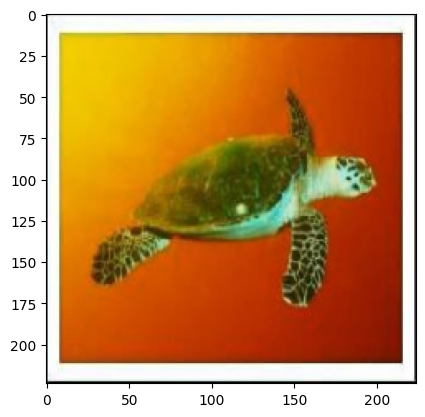

In [338]:
image = cv2.imread('C:/Users/shilp/OneDrive/Documents/CS671/A5_data/train/2/image_0048.jpg')
image = cv2.resize(image, (224, 224))
plt.imshow(image)

image.shape

In [339]:
test = np.expand_dims(image, axis=0)
test.shape

(1, 224, 224, 3)

In [340]:
def get_feature(layer_name, test):
  layer_outputs = [layer.output for layer in model_2.layers if layer.name == layer_name]
  activation_model = Model(inputs=model_2.input, outputs=layer_outputs)
  return activation_model.predict(test)

In [341]:
def get_feature(layer_name, test):
  layer_outputs = [model_2.layers[-5].output]
  activation_model = Model(inputs=model_2.input, outputs=layer_outputs)
  return activation_model.predict(test)

In [342]:
layer = model_2.layers[-5]
layer.name

'conv2d_5'

In [343]:
last_conv = get_feature(layer , test)

1/1 [==============================] - 0s 95ms/step


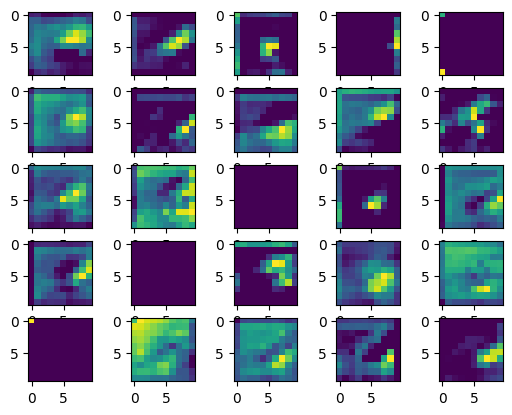

In [344]:
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(np.squeeze(last_conv[:, :, :, i]))
plt.show()

In [345]:
max_pos = np.argmax(np.squeeze(last_conv[:, :, :, 1]))
max_pos

47

In [346]:
np.ndarray.flatten(np.squeeze(last_conv[:, :, :, i]))[max_pos], np.amax(np.squeeze(last_conv[:, :, :, 1]))

(19.138536, 191.75464)

In [347]:
#max_pos = np.argmax(np.squeeze(last_conv[:, :, :, 1]))
max_value = np.max(np.squeeze(last_conv[:, :, :, 1]))
max_pos = np.where(np.squeeze(last_conv[:, :, :, 1]) == max_value)
max_pos = (max_pos[0][0], max_pos[1][0])
max_pos

(4, 7)

In [348]:
def trace_patch(kernel_size, stride, max_pos):
    '''
    This function returns the positions of the pixels in the previous feature map that correspond to the output pixel at max_pos.
    kernel_size: size of the convolution kernel
    stride: stride of the convolution
    max_pos: (x,y) coordinates of the output pixel in the current feature map
    '''
    padding = 0
    input_positions = []
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = (max_pos[0] * stride) - padding + j
            y = (max_pos[1] * stride) - padding + i
            input_positions.append((x,y))
    
    return input_positions


In [349]:
patch1 = trace_patch(3,2, max_pos) 

In [350]:
patch2 = []
for i in patch1:
  patch2.extend(trace_patch(5,1,i))

patch2 = list(set(patch2)) #unique positions only
print(len(patch2))

49


In [351]:
patch3 = []
for i in patch2:
  patch3.extend(trace_patch(3,2, i))

patch3 = list(set(patch3)) #unique positions only
# print(patch3)

In [352]:
patch4 = []
for i in patch3:
  patch4.extend(trace_patch(11,4,i))

patch4 = list(set(patch4)) #unique positions only

In [353]:
# Create a copy of the image to draw the rectangle on
image_with_rectangle = image.copy()

In [354]:
def find_extreme_pixels(pixel_points):
    # initialize variables to store extreme pixels
    bottom_left = pixel_points[0]
    bottom_right = pixel_points[0]
    top_left = pixel_points[0]
    top_right = pixel_points[0]

    # loop through all the pixels to find the extreme pixels
    for pixel in pixel_points:
        if pixel[1] > bottom_left[1] or (pixel[1] == bottom_left[1] and pixel[0] < bottom_left[0]):
            bottom_left = pixel
        if pixel[1] > bottom_right[1] or (pixel[1] == bottom_right[1] and pixel[0] > bottom_right[0]):
            bottom_right = pixel
        if pixel[1] < top_left[1] or (pixel[1] == top_left[1] and pixel[0] < top_left[0]):
            top_left = pixel
        if pixel[1] < top_right[1] or (pixel[1] == top_right[1] and pixel[0] > top_right[0]):
            top_right = pixel

    # return the extreme pixels
    return bottom_left, bottom_right, top_left, top_right

In [355]:
bottom_left, bottom_right, top_left, top_right = find_extreme_pixels(patch4)
print(bottom_left,bottom_right,top_left,top_right)

(64, 178) (130, 178) (64, 112) (130, 112)


In [356]:
# Determine the rectangle dimensions
width = bottom_right[0] - top_left[0]
height = bottom_right[1] - top_left[1]

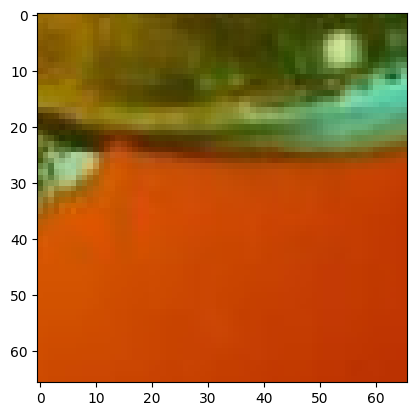

In [357]:
# Extract the rectangular region from the original image
rectangular_region = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
plt.imshow(rectangular_region)

In [358]:
# Draw the rectangle on the copied image
cv2.rectangle(image_with_rectangle, top_left, bottom_right, (0, 254, 0), thickness=2)

array([[[  5,   8,   5],
        [ 21,  27,  21],
        [  2,   4,   2],
        ...,
        [  4,   0,   0],
        [ 15,  13,  13],
        [  7,   6,   6]],

       [[ 70,  77,  70],
        [197, 202, 196],
        [216, 217, 213],
        ...,
        [224, 223, 223],
        [211, 210, 210],
        [ 73,  73,  73]],

       [[ 47,  50,  47],
        [237, 240, 235],
        [252, 253, 249],
        ...,
        [251, 249, 249],
        [248, 247, 247],
        [ 50,  50,  50]],

       ...,

       [[ 53,  62,  61],
        [239, 247, 247],
        [229, 233, 234],
        ...,
        [253, 253, 253],
        [240, 240, 240],
        [ 54,  54,  54]],

       [[ 35,  36,  35],
        [211, 215, 214],
        [220, 222, 222],
        ...,
        [221, 221, 221],
        [213, 213, 213],
        [ 89,  89,  89]],

       [[ 13,  14,  14],
        [ 40,  42,  42],
        [  0,   1,   1],
        ...,
        [  1,   1,   1],
        [ 15,  15,  15],
        [  5,   5,   5]]

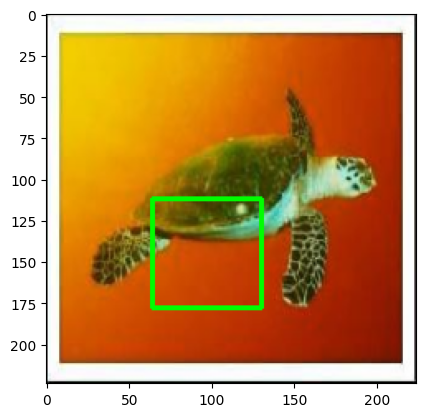

In [359]:
plt.imshow(image_with_rectangle)